In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import os
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import seaborn as sn
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mitigationfile = pd.read_csv(r'C:\Users\i23733\Desktop\notebooks\projects\mitigation\distance.csv')
mitigation = pd.DataFrame(mitigationfile)
#mitigation = mitigation.fillna('')

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (48,49,50,51,52,53,55,56,58,59,62,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
list(mitigation.columns.values.tolist())

['wkt_geom',
 'fid',
 'Join_Count',
 'TARGET_FID',
 'OBJECTID',
 'st_num',
 'st_name',
 'numocc',
 'specneed',
 'StructureT',
 'struct_num',
 'vis_add',
 'gate',
 'ing_egg',
 'road_cond',
 'BridgeWeig',
 'DrivewayWi',
 'drivelen',
 'turn',
 'roof',
 'clean',
 'eaves',
 'Vents',
 'bld_ext',
 'decks',
 'comb_mat',
 'propane',
 'site_water',
 'fveg_z1',
 'sveg_z1',
 'lad_fl1',
 'fveg_z2',
 'sveg_z2',
 'lad_fuel_2',
 'contfuel',
 'StructAlig',
 'slope',
 'setback',
 'pos_slope',
 'aspect',
 'FFRiskAcce',
 'FFRiskProp',
 'FFRiskOHPo',
 'FFRiskPets',
 'FFRiskHazM',
 'FFRiskEsca',
 'FFRiskSola',
 'notes',
 'lat_str',
 'long_str',
 'own_name',
 'taxlot',
 'road_width',
 'util',
 'zone_1_mit',
 'firesafe',
 'home_mit',
 'relhaz',
 'hazclass',
 'firedist',
 'NewTaxLot',
 'County',
 'Prop_ID',
 'FamDisPlan',
 'PrepEmergK',
 'IDEvacRout',
 'RSGPartici',
 'HomeCheckl',
 'EvacDrill',
 'RFI',
 'FirstRespR',
 'DateCollec',
 'ParcelID',
 'StructRisk',
 'ParcelRisk',
 'TotalRisk',
 'HomeGoKit',
 'Regist

In [49]:
mitigation['slope'].unique()

array([ 4., nan,  2.,  1.,  3.,  5.])

In [50]:
mitigation['SLOPEfl'] = mitigation['SLOPEfl'].replace({'S1':1,'S2':2,'S3':3,'S5':5})

In [20]:
# get rid of anything that doesn't have a FL score
mitigation = mitigation.loc[mitigation['ADJ_SCORE'] >= 0]
len(mitigation)

In [23]:
# Get the names of the fires where there were losses
# create a list to select the points in close prox to those fires
#loss = mitigation.loc[(mitigation.loss.notnull())]
loss = mitigation.loc[(mitigation.loss == 1)]
x = list(loss['closestfirename'].unique())
print x

['Moccasin Hill', 'BISCUIT COMPLEX', 'Chetco Bar']


In [24]:
def corr(df):
    result = df.corr()
    print sn.heatmap(result, annot=True, fmt = '.1g', cmap= 'coolwarm')

In [55]:
fields = ['SLOPEfl','slope','setback','pos_slope','aspect','StructRisk','ParcelRisk','TotalRisk']
fields2 = ['StructRisk','ParcelRisk','TotalRisk','roof','clean','eaves','Vents','ADJ_SCORE','ADJ_FUEL','relhaz']

AxesSubplot(0.125,0.125;0.62x0.755)


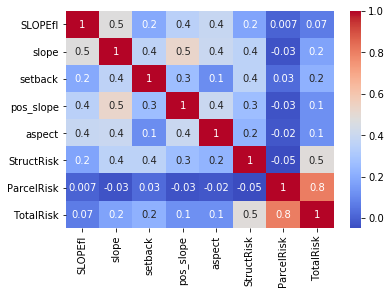

In [56]:
# look at everything
mit = mitigation[fields]
#mit['loss'] = mit['loss'].fillna(0)
corr(mit)

AxesSubplot(0.125,0.125;0.62x0.755)


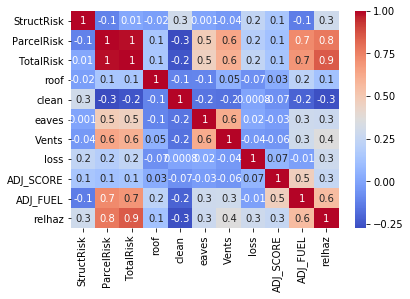

In [46]:
# looking at just the properties within 2 miles of the fires where there were damages
# losses & within 2mi - not damaged
prx = mitigation.loc[(mitigation.closestdistance_miles_ < 2) & (mitigation.closestfirename.isin(x))]
prx = prx[fields]

prx['loss'] = prx['loss'].fillna(0)

corr(prx)

AxesSubplot(0.125,0.125;0.62x0.755)


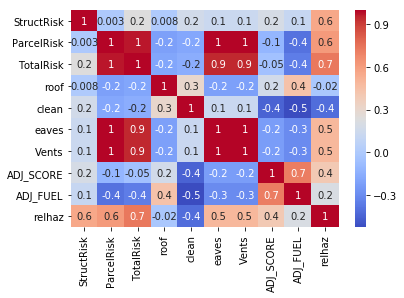

In [42]:
# just losses
loss = mitigation.loc[mitigation['loss'] == 1]
loss = loss[fields2]

corr(loss)

AxesSubplot(0.125,0.125;0.62x0.755)


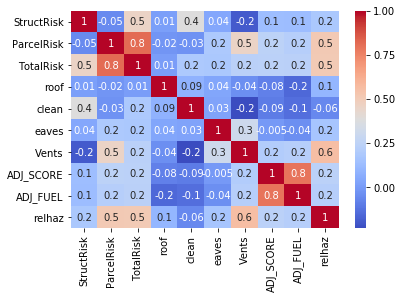

In [43]:
# excluding losses & excluding those within 2mi of perimeter
outside2mi = mitigation.loc[(mitigation.closestdistance_miles_ > 2)]
outside2mi = outside2mi[fields2]
outside2mi['relhaz'] = outside2mi['relhaz'].dropna()
corr(outside2mi)

In [33]:
len(outside2mi)

21982

In [ ]:
# clean out '.'

#mitigation = mitigation.apply(lambda x: x.str.replace('.','') if x.name in ['roof','clean','eaves','Vents','bld_ext','decks'] else x, axis=1)
#mitigation['hazclass_numeric'] = mitigation['hazclass'].replace({'Negligible':1, 'Very Low':2,'Low':3, 'Moderate':4, 'High':5, 'Very High':6, 'Extreme':7})